In [49]:
# загрузим полезные модули
from collections import defaultdict as dd
import numpy as np
# из pandas берем удобные функции для таблиц. можно не использовать её
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
# визуализация циклов
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")
import time
import os
from fake_useragent import UserAgent

__ДАЛЕЕ ИДЁТ УЖЕ ОБРАБОТКА EDA__

__#1__ Удаляем повторяющиеся фильмы, начинающиеся на [4k]

In [4]:
df = pd.read_csv('project2.csv')
df

,Название,Страна,Жанр,Год выпуска,Возрастное ограничение,Продолжительность,Рейтинг
0,"На солнце, вдоль рядов кукурузы",Россия,Драмы,2023,6,89,"8,4"
1,Подрыв,Беларусь,Драмы,2022,16,110,"7,5"
2,Беспринципные в деревне,Россия,Комедии,2023,18,86,"7,2"
3,Нюрнберг,Россия,Драмы,2023,12,124,"8,1"
4,Моё прекрасное несчастье,США,Комедии,2023,18,91,"7,7"
...,...,...,...,...,...,...,...
2286,Русалка. Озеро мертвых,Россия,Ужасы,2018,16,83,"5,5"
2287,Форсаж 4,США,Криминал,2009,16,106,"8,8"
2288,Полночь на злаковом поле,США,Триллеры,2021,16,98,"6,7"
2289,Грань времени,США,Фантастика,2016,16,99,"5,2"


In [5]:
df['Название'].str.contains(r'\[4K]').sum()

4

In [6]:
df['Название'].str.contains(r'\[4k]').sum()

28

In [7]:
df.drop(index=df[df['Название'].str.contains(r'\[4k]')].index.values,
                                               labels=None, axis=0, inplace=True)

In [8]:
df.drop(index=df[df['Название'].str.contains(r'\[4K]')].index.values,
                                               labels=None, axis=0, inplace=True)

In [9]:
df[df['Название'].str.contains(r'\[4k]')].index.values

array([], dtype=int64)

__#2__ Удаляем сериалы, случайно попавшие в общий список (их продолжительность записывается как 1 сезон)

In [10]:
len(df[df['Продолжительность']==1])

87

In [11]:
df.drop(index=df[df['Продолжительность']== 1 ].index.values,labels=None, axis=0, inplace=True)

In [12]:
df

,Название,Страна,Жанр,Год выпуска,Возрастное ограничение,Продолжительность,Рейтинг
0,"На солнце, вдоль рядов кукурузы",Россия,Драмы,2023,6,89,"8,4"
1,Подрыв,Беларусь,Драмы,2022,16,110,"7,5"
2,Беспринципные в деревне,Россия,Комедии,2023,18,86,"7,2"
3,Нюрнберг,Россия,Драмы,2023,12,124,"8,1"
4,Моё прекрасное несчастье,США,Комедии,2023,18,91,"7,7"
...,...,...,...,...,...,...,...
2285,Марионетка,Нидерланды,Триллеры,2020,18,107,"6,5"
2286,Русалка. Озеро мертвых,Россия,Ужасы,2018,16,83,"5,5"
2287,Форсаж 4,США,Криминал,2009,16,106,"8,8"
2288,Полночь на злаковом поле,США,Триллеры,2021,16,98,"6,7"


In [13]:
df.reset_index(drop=True)

,Название,Страна,Жанр,Год выпуска,Возрастное ограничение,Продолжительность,Рейтинг
0,"На солнце, вдоль рядов кукурузы",Россия,Драмы,2023,6,89,"8,4"
1,Подрыв,Беларусь,Драмы,2022,16,110,"7,5"
2,Беспринципные в деревне,Россия,Комедии,2023,18,86,"7,2"
3,Нюрнберг,Россия,Драмы,2023,12,124,"8,1"
4,Моё прекрасное несчастье,США,Комедии,2023,18,91,"7,7"
...,...,...,...,...,...,...,...
2167,Марионетка,Нидерланды,Триллеры,2020,18,107,"6,5"
2168,Русалка. Озеро мертвых,Россия,Ужасы,2018,16,83,"5,5"
2169,Форсаж 4,США,Криминал,2009,16,106,"8,8"
2170,Полночь на злаковом поле,США,Триллеры,2021,16,98,"6,7"


In [257]:
#df.to_csv('project_dropped1.csv', index=False, columns=['Название', 'Страна', 'Жанр', 'Год выпуска', 'Возрастное ограничение', 'Продолжительность','Рейтинг'])

__#3__ Находим название стран для фильмов, у которых не был указан регион на сайте ivi

In [14]:
df[df['Страна'].str.contains(r'минут')]

,Название,Страна,Жанр,Год выпуска,Возрастное ограничение,Продолжительность,Рейтинг
1155,Сторожевая застава,Фэнтези106 минут,Фэнтези,2017,6,106,"7,0"
1238,Выход,Криминал88 минут,Криминал,2009,16,88,"5,8"
1991,Кушать подано!,Комедии85 минут,Комедии,2006,16,85,"7,8"
2028,Свободная энергия Теслы,Документальные52 минуты,Документальные,2013,6,52,"8,1"


Интересный факт: фильмы, у которых нет страны выпуска на сайте ИВИ, относятся к киноматографу Украины

In [15]:
df['Страна'][1155] ='Украина' #Сторожевая застава
df['Страна'][1238]='Украина' #"Выход"
df['Страна'][1991]='Украина' #Кушать подано!
df['Страна'][2028]='Украина'#Свободная энергия Теслы

In [16]:
print(df['Страна'][1155])
print(df['Страна'][1238])
print(df['Страна'][1991])
print(df['Страна'][2028])

Украина
Украина
Украина
Украина


__#4__  Удаляем страны, у которых в выборке наблюдается маленькое кол-во фильмов (для справедливости представления среднего рейтинга по всем странам)

Найдем эти страны и уберем, так как их средний рейтинг фильма будет выше, чем допустим у стран, которые сняли больше фильмов 

In [18]:
df['Страна'].str.contains(r'Ливан').sum()

1

In [63]:
countries= df['Страна'].value_counts(ascending=True).to_frame()
countries.head()

,Страна
Нидерланды,13
Норвегия,13
Ирландия,17
Китай,17
Дания,21


In [62]:
data = countries[countries['Страна']<9]
data.head()

,Страна
Египет,1
Колумбия,1
Ливан,1
Марокко,1
Швейцария,1


In [64]:
countries_array = data.index.values
#countries_array
list_countries = countries_array.tolist()

In [23]:
len(list_countries)

37

In [20]:
for country in list_countries:
    #print(country)
    df.drop(index=df[df['Страна'].str.contains(country)].index.values,
                                               labels=None, axis=0, inplace=True)

In [21]:
df.reset_index(drop=True)

,Название,Страна,Жанр,Год выпуска,Возрастное ограничение,Продолжительность,Рейтинг
0,"На солнце, вдоль рядов кукурузы",Россия,Драмы,2023,6,89,"8,4"
1,Беспринципные в деревне,Россия,Комедии,2023,18,86,"7,2"
2,Нюрнберг,Россия,Драмы,2023,12,124,"8,1"
3,Моё прекрасное несчастье,США,Комедии,2023,18,91,"7,7"
4,Взломщик,США,Криминал,2023,18,91,"6,5"
...,...,...,...,...,...,...,...
2056,Марионетка,Нидерланды,Триллеры,2020,18,107,"6,5"
2057,Русалка. Озеро мертвых,Россия,Ужасы,2018,16,83,"5,5"
2058,Форсаж 4,США,Криминал,2009,16,106,"8,8"
2059,Полночь на злаковом поле,США,Триллеры,2021,16,98,"6,7"


In [61]:
#df.to_csv('project_dropped1.csv', index=False, columns=['Название', 'Страна', 'Жанр', 'Год выпуска', 'Возрастное ограничение', 'Продолжительность','Рейтинг'])

__#5__ Меняем тип данных в колонках

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2289
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Название                2061 non-null   object
 1   Страна                  2061 non-null   object
 2   Жанр                    2061 non-null   object
 3   Год выпуска             2061 non-null   object
 4   Возрастное ограничение  2061 non-null   int64 
 5   Продолжительность       2061 non-null   int64 
 6   Рейтинг                 2061 non-null   object
dtypes: int64(2), object(5)
memory usage: 128.8+ KB


_Столбцы: Год выпуска и Рейтинг - меняем тип данных на int и float соотвественно_

In [23]:
df['Рейтинг']=df['Рейтинг'].apply(lambda x: x.replace(',','.'))

In [24]:
df=df.astype({'Год выпуска': int,'Рейтинг':float})

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2289
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Название                2061 non-null   object 
 1   Страна                  2061 non-null   object 
 2   Жанр                    2061 non-null   object 
 3   Год выпуска             2061 non-null   int32  
 4   Возрастное ограничение  2061 non-null   int64  
 5   Продолжительность       2061 non-null   int64  
 6   Рейтинг                 2061 non-null   float64
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 120.8+ KB


__#6__ Визуализация

(array([  2.,   5.,  26.,  61.,  82., 209., 366., 575., 635., 100.]),
 array([1.8 , 2.56, 3.32, 4.08, 4.84, 5.6 , 6.36, 7.12, 7.88, 8.64, 9.4 ]),
 <BarContainer object of 10 artists>)

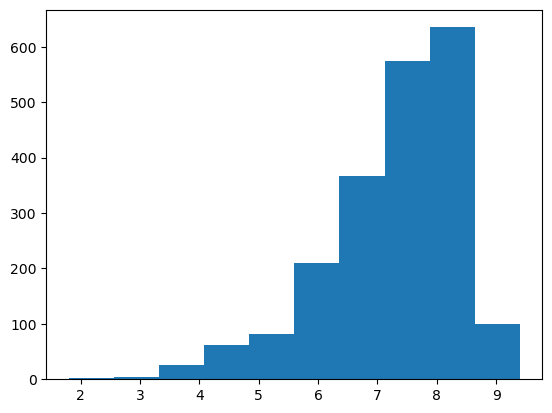

In [31]:
plt.hist(df['Рейтинг'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22cd4bfb340>,
 'caps': [<matplotlib.lines.Line2D at 0x22cd4bfb8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22cd4bfb040>],
 'medians': [<matplotlib.lines.Line2D at 0x22cd4bfbe80>],
 'fliers': [<matplotlib.lines.Line2D at 0x22cd4c0b190>],
 'means': []}

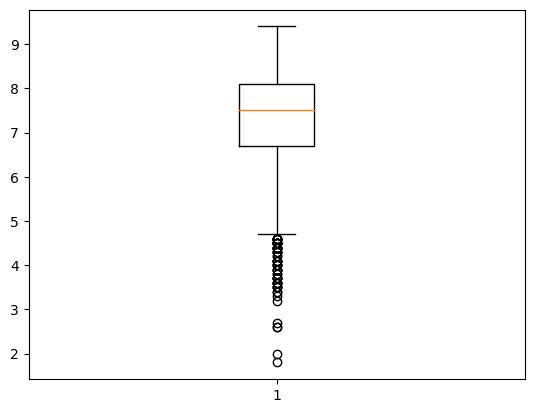

In [32]:
plt.boxplot(df['Рейтинг'])

Из гистограммы заметно. что в нашей выборке большая часть фильмов имеет рейтинг 7.5-8.5. Также можно обнаружить некоторые выбросы, поскольку график имеет левостороннюю асимметрию и вытянутый хвост, что связано с наличием фильмов с оценкой 2-3,похожая тенденция наблюдается и на графике "Ящик с усами" (существует множество точек, расположенных за нижней графицей ящика). В дополнении можно сказать про несхожесть с графиков нормального распредления.

In [33]:
countr_df=df.groupby('Страна')['Рейтинг'].agg(['mean'])
countr_df=countr_df.sort_values('mean',ascending=True)
countr_df.head()

,mean
Страна,
Канада,6.396296
Дания,6.595238
Италия,6.760526
Испания,6.772973
Ирландия,6.829412


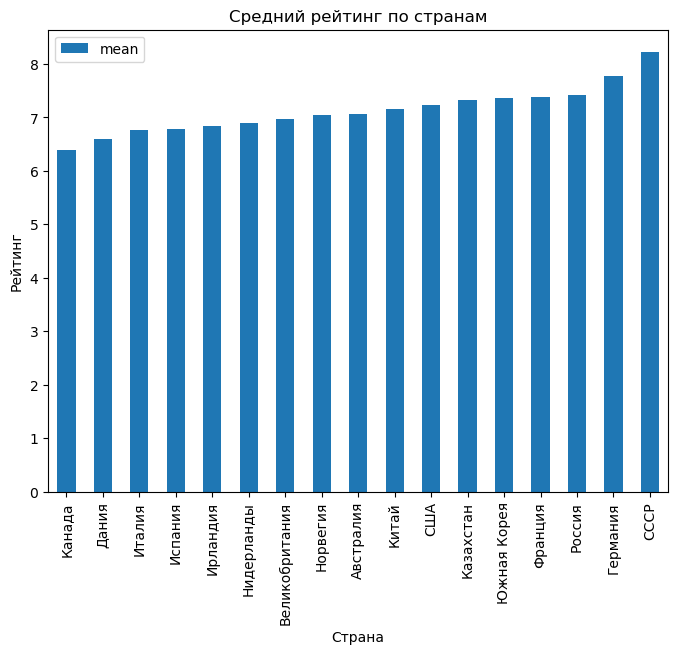

In [34]:
countr_df.plot( kind='bar', title='Средний рейтинг по странам', figsize=(8, 6))
plt.xlabel("Страна")
plt.ylabel("Рейтинг")
plt.show()

Из графика выше наблюдается: средний рейтинг наших отечественных и современных фильмов один из самых высоких, по оценкам Иви. В остальном, не выявляется никаких существенных разбросов между стран, поэтому средний рейтинг варируется в основном в диапозоне от 6.3 до 8.

In [28]:
mean_age=df.groupby('Возрастное ограничение')['Рейтинг'].mean().to_frame()
mean_age=mean_age.reset_index()
mean_age

,Возрастное ограничение,Рейтинг
0,0,8.171053
1,6,8.082432
2,12,7.854926
3,16,7.046595
4,18,6.884419


Text(0.5, 1.0, 'Зависимость рейтинга от возрастного ограничения')

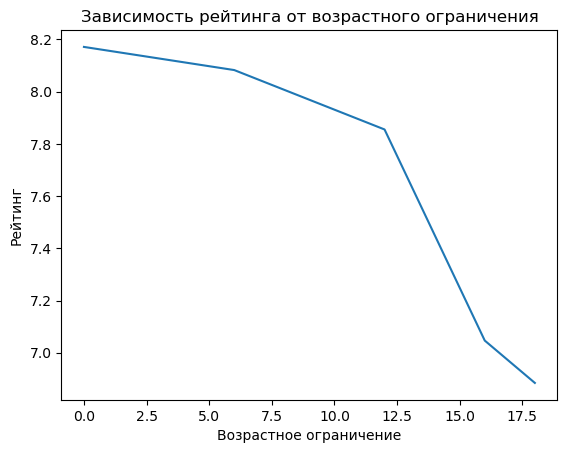

In [30]:
plt.plot(mean_age['Возрастное ограничение'],mean_age['Рейтинг'])
plt.xlabel("Возрастное ограничение")
plt.ylabel("Рейтинг")
plt.title('Зависимость рейтинга от возрастного ограничения')

Построенная кривая явно доказывает, что фильмы по мере роста возрастного ограничения начинают получать более низкие оценки. Можно сделать вывод: людям больше нравятся мультфильмы/семейные фильмы, нежели киноматограф более возрастного характера. Или же это может быть связано с количеством оценок (параметр не рассматривается в нашем проекте), так как детсике и семейные фильмы могут смотреть как взрослые, так и дети, поэтому оценок может быть больше. Тем не менее, средние оценки остаются высокими.

Text(0, 0.5, 'Возрастное ограничение')

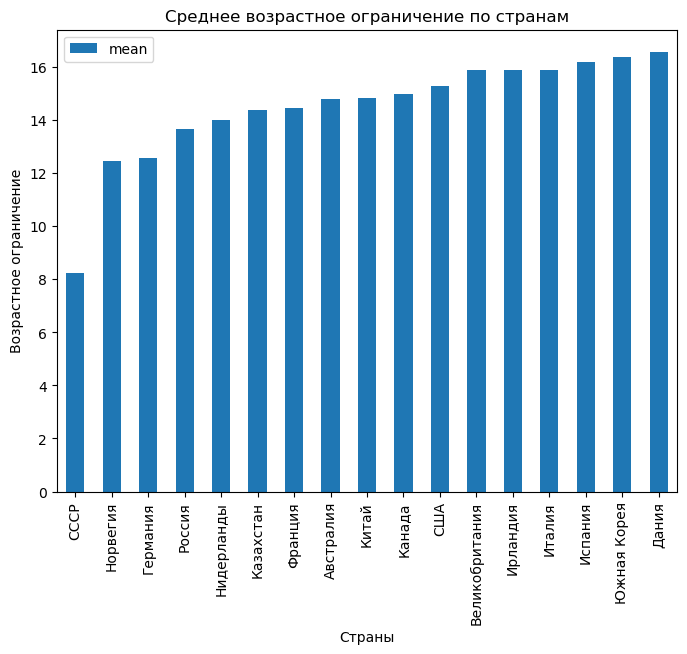

In [31]:
countr_year=df.groupby('Страна')['Возрастное ограничение'].agg(['mean'])
countr_year=countr_year.sort_values(by='mean',ascending=True)
countr_year.plot( kind='bar', title='Среднее возрастное ограничение по странам', figsize=(8, 6))
plt.xlabel("Страны")
plt.ylabel("Возрастное ограничение")

По мере убывания среднего возрастного ограничения можно сказать, что в странах с меньшим возрастным порогом преобладают так же и фильмы детского/семейного характера. Говоря об СССР, можно сказать, что распределение среднего возрастного ограничения находится около 8, что связано с преобладанием фильмов советского формата (смотреть облако СССР-жанры ниже), имеющие низкое возрастное ограничение (0+,6+,12+).

Text(0, 0.5, 'Дисперсия рейтинга')

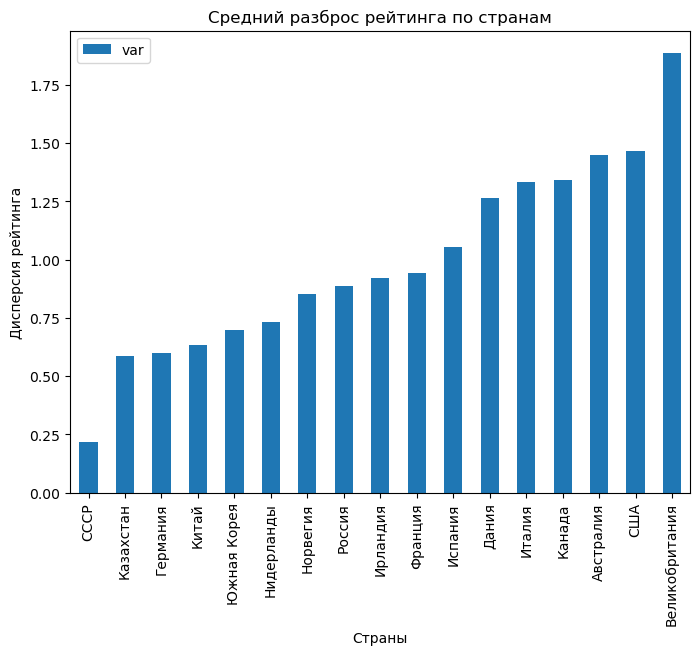

In [32]:
var=df.groupby('Страна')['Рейтинг'].agg(['var'])
var=var.sort_values(by='var',ascending=True)
var.plot( kind='bar', title='Средний разброс рейтинга по странам', figsize=(8, 6))
plt.xlabel("Страны")
plt.ylabel("Дисперсия рейтинга")

Наиболее сильный разброс наблюдается в Великобритании, в то время как в СССР рейтинг варируется немного и как было выше показано держится на высоком уровне (около 8), что, в свою очередь, объясняется просмотром классического киноматографа ("Бриллиантовая рука";"Иван Васильевич меняет профессию";"Мэри Поппинс, до свидания").

In [79]:
df[(df['Страна']=='Россия')&(df['Год выпуска']<2010)]

,Название,Страна,Жанр,Год выпуска,Возрастное ограничение,Продолжительность,Рейтинг
34,В августе 44-го,Россия,Военные,2001,16,105,8.4
160,Сволочи,Россия,Драмы,2006,16,97,8.6
233,Любовь-морковь,Россия,Комедии,2007,18,104,7.9
276,Звезда,Россия,Боевики,2002,16,93,7.8
290,Брат,Россия,Криминал,1997,18,95,8.8
...,...,...,...,...,...,...,...
2053,Параграф 78: Фильм второй,Россия,Фантастика,2007,16,89,7.2
2062,Стритрейсеры,Россия,Боевики,2008,16,108,7.2
2094,Перегон,Россия,Драмы,2006,16,139,7.0
2147,Приходи на меня посмотреть,Россия,Мелодрамы,2000,16,101,8.6


In [80]:
df[(df['Страна']=='Россия')&(df['Год выпуска']>=2010)]

,Название,Страна,Жанр,Год выпуска,Возрастное ограничение,Продолжительность,Рейтинг
0,"На солнце, вдоль рядов кукурузы",Россия,Драмы,2023,6,89,8.4
2,Беспринципные в деревне,Россия,Комедии,2023,18,86,7.2
3,Нюрнберг,Россия,Драмы,2023,12,124,8.1
6,Любовь-морковь: Восстание машин,Россия,Комедии,2023,16,94,7.2
7,Эскортница,Россия,Драмы,2023,18,90,6.3
...,...,...,...,...,...,...,...
2258,Команда мечты,Россия,Спорт,2019,6,81,7.7
2259,Ловушка,Россия,Криминал,2021,16,84,6.1
2266,Дедушка,Россия,Мелодрамы,2016,12,104,8.0
2275,Тибра,Россия,Триллеры,2022,16,84,5.8


In [26]:
russia=df[df['Страна']=='Россия']
years_russia=russia.groupby('Год выпуска')['Название'].count().to_frame()
years_russia=years_russia.reset_index()
years_russia.columns=['Год выпуска','Кол-во фильмов']
years_russia.head()

,Год выпуска,Кол-во фильмов
0,1921,1
1,1992,1
2,1993,1
3,1995,2
4,1997,2


Text(0.5, 1.0, 'Динамика выпуска фильмов в России за период 1921-2023')

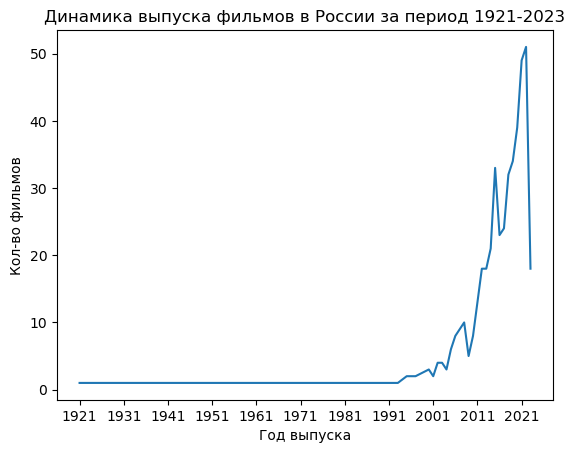

In [76]:
plt.plot(years_russia['Год выпуска'],years_russia['Кол-во фильмов'])
plt.xticks(range(years_russia['Год выпуска'].min(), max(years_russia['Год выпуска']),10))
plt.xlabel("Год выпуска")
plt.ylabel("Кол-во фильмов")
plt.title('Динамика выпуска фильмов в России за период 1921-2023')

График, представленный выше, обнаруживает тенденцию к увеличению выпуска фильмов, начиная с начала 1990-х. Из истории кино известно, что в 2000-е годы стали появляться кинокомпании, которые занимаются массовым производством телевизионных фильмов, что объясняет резкие скачки в кол-ве фильмов в те времена. Значительные падения в выпуске кино могут быть объяснены через кризисы (2008,2014-2015 и в короновирус 2020-2021)

In [97]:
df[((df['Страна']=='СССР')|(df['Страна']=='Россия'))&(df['Жанр']=='Для детей')]

,Название,Страна,Жанр,Год выпуска,Возрастное ограничение,Продолжительность,Рейтинг
988,Королевство кривых зеркал,СССР,Для детей,1963,0,74,8.4
1110,Уроки выживания,Россия,Для детей,2015,6,86,7.9
1248,"Добро пожаловать, или Посторонним вход воспрещен",СССР,Для детей,1964,6,70,8.8
1399,Страна хороших деточек,Россия,Для детей,2013,12,78,7.9
1554,Частное пионерское 2,Россия,Для детей,2015,6,99,8.5
1675,Усатый нянь,СССР,Для детей,1977,0,70,8.5
1737,Мама,СССР,Для детей,1976,0,83,8.2
1873,Золотой ключик,СССР,Для детей,1939,0,76,7.3


In [98]:
df[df['Год выпуска']>=2000]

,Название,Страна,Жанр,Год выпуска,Возрастное ограничение,Продолжительность,Рейтинг
0,"На солнце, вдоль рядов кукурузы",Россия,Драмы,2023,6,89,8.4
2,Беспринципные в деревне,Россия,Комедии,2023,18,86,7.2
3,Нюрнберг,Россия,Драмы,2023,12,124,8.1
4,Моё прекрасное несчастье,США,Комедии,2023,18,91,7.7
5,Взломщик,США,Криминал,2023,18,91,6.5
...,...,...,...,...,...,...,...
2285,Марионетка,Нидерланды,Триллеры,2020,18,107,6.5
2286,Русалка. Озеро мертвых,Россия,Ужасы,2018,16,83,5.5
2287,Форсаж 4,США,Криминал,2009,16,106,8.8
2288,Полночь на злаковом поле,США,Триллеры,2021,16,98,6.7


In [99]:
df[df['Год выпуска']<2000]

,Название,Страна,Жанр,Год выпуска,Возрастное ограничение,Продолжительность,Рейтинг
90,Офицеры (цветная версия),СССР,Советские,1971,6,95,9.0
100,Мумия,США,Фэнтези,1999,12,124,8.3
103,Майор Пэйн,США,Комедии,1995,16,96,8.5
108,Бойцовский клуб,США,Триллеры,1999,18,133,8.6
114,Спящие,США,Драмы,1996,16,146,8.3
...,...,...,...,...,...,...,...
2253,Поезд вне расписания,СССР,Советские,1986,12,75,7.5
2268,Небеса обетованные,СССР,Драмы,1991,16,117,8.3
2279,Хакеры,США,Триллеры,1995,12,105,7.9
2280,Любовный напиток №9,США,Комедии,1992,16,92,6.9


In [57]:
rate_year=df.groupby('Год выпуска')['Рейтинг'].mean().to_frame()
rate_year=rate_year.reset_index()
rate_year.head()

,Год выпуска,Рейтинг
0,1921,6.6
1,1939,7.3
2,1946,8.4
3,1947,8.2
4,1950,7.6


Text(0.5, 1.0, 'Динамика рейтинга фильмов по странам за период 1920-2023')

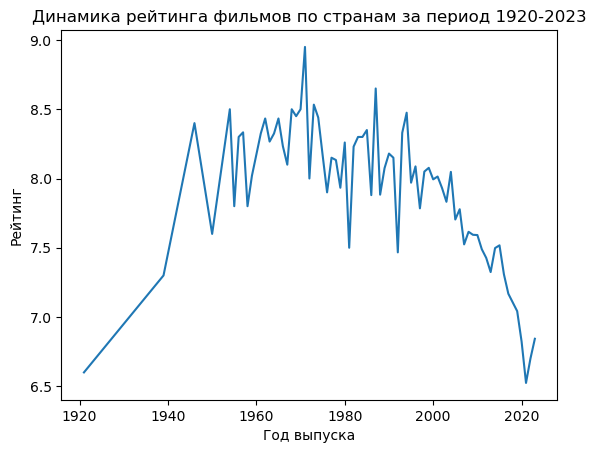

In [61]:
plt.plot(rate_year['Год выпуска'],rate_year['Рейтинг'])
plt.xlabel("Год выпуска")
plt.ylabel("Рейтинг")
plt.title('Динамика рейтинга фильмов по странам за период 1920-2023')

Построенный график иллюстрирует, что с 1940 до 2008 рейтинг принимает значения в отрезке от 7.5 до 8.7, а после сменяется на отрицательный тренд, что может быть связано с тем, что фильмы стали носить более развлекательный характер, направленный на коммерческий успех. Также необходимо обратить внимание на кол-во фильмов в выборке в зависимости от года выпуска: проектов, выпущенных в 20 веке, оказалось в распределении меньше, чем современных (в прошлом киноматограф был недостаточно развит, что оказывало влияние на кол-во снимаемых фильмов, которые, однако, высоко оценивались. Но в текущее время, когда выпускается множество разного кино, рейтинг имеет больше возможностей для варьируемости, поэтому из-за плохо снятых фильмов средний рейтинг по всем странам уменьшается) 

In [ ]:
#df.to_csv('project_dropped2.csv', index=False, columns=['Название','Страна','Жанр','Год выпуска','Возрастное ограничение','Продолжительность','Рейтинг'])

In [68]:
from wordcloud import WordCloud

In [69]:
def generate_wordcloud(data):
    wc = WordCloud(width=800, height=800) #задаём функцию построения облака с размером расстояния букв
    #при меньшим кол-вом шрифт не четкий и замыленный
    wc.generate_from_frequencies(data) #из данных генерируем слова
    plt.figure(figsize=(4, 4), facecolor=None) 
    plt.imshow(wc) #визуализация
    plt.axis("off") #убираю подписи цифр на осях
    plt.tight_layout(pad=0) #расстояние между графической границей и границей подграфиков (размер шрифта)
    plt.show()

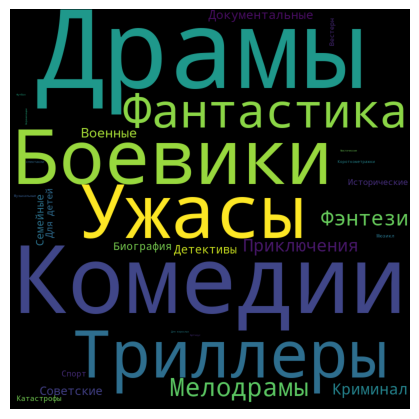

In [123]:
generate_wordcloud(df['Жанр'].value_counts().to_dict()) 

In [81]:
df['Жанр'].value_counts().head()

Драмы       376
Комедии     349
Боевики     213
Ужасы       207
Триллеры    197
Name: Жанр, dtype: int64

Из облака-слов, представленного выше, выявляется, что наиболее популярные за все года среди всех стран были жанры: драмы,комедии, боевики и ужасы. Тем не менее, нельзя забывать про тот факт, что, скорее всего, на распределение оказало большее влияние кол-во жанров фильмов, выпущенных в современности.

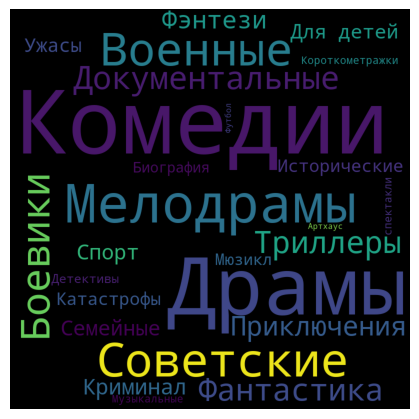

In [87]:
generate_wordcloud(df[(df['Страна']=='Россия')|(df['Страна']=='СССР')]['Жанр'].value_counts().to_dict()) 

In [86]:
df[(df['Страна']=='Россия')|(df['Страна']=='СССР')]['Жанр'].value_counts().head()

Комедии      146
Драмы        117
Мелодрамы     41
Советские     30
Военные       28
Name: Жанр, dtype: int64

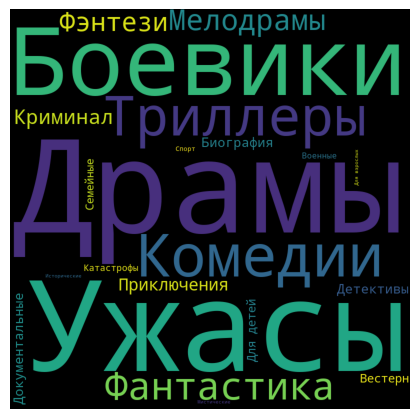

In [125]:
generate_wordcloud(df[df['Страна']=='США']['Жанр'].value_counts().to_dict()) 

In [83]:
df[df['Страна']=='США']['Жанр'].value_counts().head()

Драмы       146
Ужасы       138
Боевики     133
Комедии     107
Триллеры    103
Name: Жанр, dtype: int64

Облака-слов по распространенности жанров, построенные для России (СССР) и США, отличаются. В России (за все временя) преобладают комедии и драмы, а в США - драмы, ужасы и боевики.

__#6__ __Гипотезы__

1) средний рейтинг фильмов с возрастным ограничением 0+ и 6+ (для любых возрастов) в россии и ссср равно 8.5 (будем рассматривать мат.ожидание в Нормальном распределении и Стьюдента. Тогда соответственно будем приводить значения переменной рейтинг в указанном срезе к тому или иному распределению, и с известным средним и стандартным отклонением будем тестировать гипотезу).

2) средняя продолжительность фильмов в Великобритании больше, чем во Франции (критерий выбора стран зависел от однородности выборок, для Франции и Великобритании кол-во наблюдений почти одинаково, что позволяет нам протестировать гипотезу продолжительности на них).

3) разброс рейтинга фильмов c 2000гг. в Канаде больше чем в Германии (выбор стран вновь зависел от кол-ва фильмов выпущенных после 2000гг. для большей релевантности)

4) Средняя продолжительность фильмов во всех странах для возрастного ограничения 12+ меньше, чем для 18+.

5) Запасная: среднее возрастное ограничение фильмов в России ниже, чем в США за период 2020-2022гг.

6) Запасная: средний рейтинг фильмов, выпущенных до 2016гг., больше, чем после 2016гг. Или средний рейтинг фильмов, выпущенных после 2016гг., принимает значение 6.

Предсказываться будет рейтинг фильма. Ипользуемая модель обучения: регрессия.

In [93]:
df[(df['Страна']=='Россия')|(df['Страна']=='СССР')][(df['Возрастное ограничение']==0)(df['Возрастное ограничение']==6)]

,Название,Страна,Жанр,Год выпуска,Возрастное ограничение,Продолжительность,Рейтинг
0,"На солнце, вдоль рядов кукурузы",Россия,Драмы,2023,6,89,8.4
45,Солдатик,Россия,Драмы,2019,6,86,8.6
48,Последний богатырь: Посланник Тьмы,Россия,Фэнтези,2021,6,107,8.4
59,Моя ужасная сестра,Россия,Комедии,2022,6,74,7.9
90,Офицеры (цветная версия),СССР,Советские,1971,6,95,9.0
...,...,...,...,...,...,...,...
2110,Москва-Кассиопея,СССР,Фантастика,1974,6,79,8.2
2162,Доживем до понедельника,СССР,Мелодрамы,1968,0,100,8.6
2236,Спящая красавица. Легенда двух королевств: Лед...,Россия,спектакли,2020,0,95,7.9
2245,Ёлки Последние,Россия,Комедии,2018,6,92,8.1


In [99]:
df['Страна'].value_counts().head()

США               906
Россия            442
Великобритания    145
Франция           118
СССР               96
Name: Страна, dtype: int64

In [106]:
df_2000= df[df['Год выпуска']>1990]
df_2000

,Название,Страна,Жанр,Год выпуска,Возрастное ограничение,Продолжительность,Рейтинг
0,"На солнце, вдоль рядов кукурузы",Россия,Драмы,2023,6,89,8.4
2,Беспринципные в деревне,Россия,Комедии,2023,18,86,7.2
3,Нюрнберг,Россия,Драмы,2023,12,124,8.1
4,Моё прекрасное несчастье,США,Комедии,2023,18,91,7.7
5,Взломщик,США,Криминал,2023,18,91,6.5
...,...,...,...,...,...,...,...
2285,Марионетка,Нидерланды,Триллеры,2020,18,107,6.5
2286,Русалка. Озеро мертвых,Россия,Ужасы,2018,16,83,5.5
2287,Форсаж 4,США,Криминал,2009,16,106,8.8
2288,Полночь на злаковом поле,США,Триллеры,2021,16,98,6.7


In [107]:
df_2000['Страна'].value_counts()

США               873
Россия            441
Великобритания    142
Франция           118
Канада             54
Германия           46
Италия             37
Южная Корея        37
Испания            37
Австралия          33
Казахстан          28
Дания              21
Китай              17
Ирландия           17
Нидерланды         13
Норвегия           13
СССР                1
Name: Страна, dtype: int64

In [116]:
df[(df['Возрастное ограничение']==18)] #df[(df['Возрастное ограничение']==18)] #

,Название,Страна,Жанр,Год выпуска,Возрастное ограничение,Продолжительность,Рейтинг
2,Беспринципные в деревне,Россия,Комедии,2023,18,86,7.2
4,Моё прекрасное несчастье,США,Комедии,2023,18,91,7.7
5,Взломщик,США,Криминал,2023,18,91,6.5
7,Эскортница,Россия,Драмы,2023,18,90,6.3
8,Призрачный дом,Южная Корея,Ужасы,2021,18,101,6.0
...,...,...,...,...,...,...,...
2262,Выжившая,Франция,Триллеры,2017,18,108,5.7
2267,Чудаки,США,Документальные,2002,18,81,8.2
2272,"Гори, гори ясно",США,Ужасы,2019,18,90,6.4
2282,Безумная дорога,Австралия,Ужасы,2021,18,87,5.5


In [119]:
df[(df['Возрастное ограничение']==12)] #|(df['Возрастное ограничение']==6) (df['Возрастное ограничение']==0)|

,Название,Страна,Жанр,Год выпуска,Возрастное ограничение,Продолжительность,Рейтинг
3,Нюрнберг,Россия,Драмы,2023,12,124,8.1
11,Праведник,Россия,Военные,2023,12,162,8.6
12,Сокровища партизанского леса,Россия,Приключения,2023,12,98,7.8
24,Девятаев,Россия,Военные,2021,12,105,8.3
30,Папы против мам,Россия,Комедии,2023,12,94,7.4
...,...,...,...,...,...,...,...
2266,Дедушка,Россия,Мелодрамы,2016,12,104,8.0
2273,"Ромашка, кактус, маргаритка",Россия,Мелодрамы,2009,12,89,6.7
2278,Вальгалла: Рагнарёк,Дания,Фэнтези,2019,12,100,5.8
2279,Хакеры,США,Триллеры,1995,12,105,7.9


In [134]:
df_years_rus_usa = df[(df['Год выпуска']==2020)|(df['Год выпуска']==2021)|(df['Год выпуска']==2022)]

In [142]:
df_years_rus_usa['Страна'].value_counts().head()

США               179
Россия            139
Франция            38
Великобритания     34
Италия             24
Name: Страна, dtype: int64

In [146]:
df[df['Год выпуска']<=2016]

,Название,Страна,Жанр,Год выпуска,Возрастное ограничение,Продолжительность,Рейтинг
31,1+1,Франция,Драмы,2011,16,112,9.0
34,В августе 44-го,Россия,Военные,2001,16,105,8.4
38,Волк с Уолл-стрит,США,Драмы,2013,18,179,8.2
39,Призрачный патруль,США,Фэнтези,2013,12,96,8.0
41,Битва за Севастополь,Россия,Военные,2015,12,117,8.3
...,...,...,...,...,...,...,...
2280,Любовный напиток №9,США,Комедии,1992,16,92,6.9
2281,Легенда о пианисте,Италия,Драмы,1998,16,120,8.3
2283,Восход,Австралия,Драмы,2014,12,102,6.7
2287,Форсаж 4,США,Криминал,2009,16,106,8.8


In [147]:
df[df['Год выпуска']>2016]

,Название,Страна,Жанр,Год выпуска,Возрастное ограничение,Продолжительность,Рейтинг
0,"На солнце, вдоль рядов кукурузы",Россия,Драмы,2023,6,89,8.4
2,Беспринципные в деревне,Россия,Комедии,2023,18,86,7.2
3,Нюрнберг,Россия,Драмы,2023,12,124,8.1
4,Моё прекрасное несчастье,США,Комедии,2023,18,91,7.7
5,Взломщик,США,Криминал,2023,18,91,6.5
...,...,...,...,...,...,...,...
2282,Безумная дорога,Австралия,Ужасы,2021,18,87,5.5
2284,Преступный квест,США,Боевики,2021,16,93,4.9
2285,Марионетка,Нидерланды,Триллеры,2020,18,107,6.5
2286,Русалка. Озеро мертвых,Россия,Ужасы,2018,16,83,5.5
